Rodney Bongcaron <br>
D212 Data Mining II <br>
March 24, 2022

<h2 style="text-align:center">Performance Assessment: Data Mining II</h2>
<h2 style="text-align:center">Clustering Analysis</h2>

### Part I: Research Question
#### A. Describe the purpose of this data mining report
1. Can we determine if a customer's will churn or not by their income, tenure and monthly charges? Using K-means clustering will be used in this analysis.
2.  The objective of the analysis is to find which customers will most likely churn by analyzing their income, rate per month and how long on average customers stay with the providers. Knowing this information the business can cater more of their resources for those customers.

### Part II: Technique Justifcation
#### B. Explain the reasons for your chosen clustering technique from part A1
1. The K-means works by grouping data points closest to the centroid of the cluster. By just looking at the data of customers who churn, a majority of them do not. Going by this information, the expected outcome will be that customers will most likely not churn.
2. One assumption of K-means clustering is that, it assumes that the clusters are of equal size. This assumption helps to determine the boundaries of the clusters (Analytics, P., 2017, August 7).
3. List of packages:
    - Pandas : For importing and manipulating the data.
    - Scipy : To used the built-in K-means clustering function.
    - Seaborn : For the visualization.

### Part III: Data Preparation 
#### C. Data preparation for the chosen data set
1.  One data processing goal is to normalized the chosen variables. Meaning that datas will be rescaled to a standard deviation of 1.
2. The variables chosen are Income, MonthlyCharges and Tenure. All these are continuous data.
3. The steps taken to prepare the data for analysis were
    - Read the clean dataset to a dataframe.
    - Select only the variables needed for the analysis.
    - Create a smaller dataframe with only the selected variables.
    - Normalized the data using the whiten method.
    - Perform the the Elbow method
    - Perform the K-means function

In [4]:
import pandas as pd

In [5]:
# importing churn data
df = pd.read_csv("data/churn_clean.csv")

In [6]:
df

CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2     f1784cfa9f6d92ae816197eb175d3c71       Yamhill    OR   
3     dc8a365077241bb5cd5ccd305136b05e       Del Mar    CA   
4     aabb64a116e83fdc4befc1fbab1663f9     Needville    TX   
...                                ...           ...   ...   
9995  9499fb4de537af195d16d046b79fd20a   Mount Holly    VT   
9996  c09a841117fa81b5c8e19afec2760104   Clarksville    TN   
9997  9c41f212d1e04dca84445019bbc9b41c      Mobeetie    TX   
9998  3e1f269b40c235a1038863ecf6b7a0df    Carrollton    GA   
9999  0ea683a03a3cd544aefe8388aab16176  Clarkesville    GA   

                     County    Zip       Lat        Lng  ...  MonthlyCharge  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571  ...     172.455519   
1                    Ogemaw  48661  44.32893  -84.24080  ...     242.632554   
2                   Yamhill  97148  45.35589 -123.24657  ...     159.947583   
3                 San Diego  92014  32.96687 -117.24798  ...     119.956840   
4                 Fort Bend  77461  29.38012  -95.80673  ...     149.948316   
...                     ...    ...       ...        ...  ...            ...   
9995                Rutland   5758  43.43391  -72.78734  ...     159.979400   
9996             Montgomery  37042  36.56907  -87.41694  ...     207.481100   
9997                Wheeler  79061  35.52039 -100.44180  ...     169.974100   
9998                Carroll  30117  33.58016  -85.13241  ...     252.624000   
9999              Habersham  30523  34.70783  -83.53648  ...     217.484000   

     Bandwidth_GB_Year Item1 Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0           904.536110     5     5      5      3      4     4     3     4  
1           800.982766     3     4      3      3      4     3     4     4  
2          2054.706961     4     4      2      4      4     3     3     3  
3          2164.579412     4     4      4      2      5     4     3     3  
4           271.493436     4     4      4      3      4     4     4     5  
...                ...   ...   ...    ...    ...    ...   ...   ...   ...  
9995       6511.252601     3     2      3      3      4     3     2     3  
9996       5695.951810     4     5      5      4      4     5     2     5  
9997       4159.305799     4     4      4      4      4     4     4     5  
9998       6468.456752     4     4      6      4      3     3     5     4  
9999       5857.586167     2     2      3      3      3     3     4     1  

[10000 rows x 50 columns]

In [7]:
# Only using the necessary variables for analysis
df = df[[
         'Income',
         'Tenure',
         'MonthlyCharge',
       ]]

In [8]:
df

Income     Tenure  MonthlyCharge
0     28561.99   6.795513     172.455519
1     21704.77   1.156681     242.632554
2      9609.57  15.754144     159.947583
3     18925.23  17.087227     119.956840
4     40074.19   1.670972     149.948316
...        ...        ...            ...
9995  55723.74  68.197130     159.979400
9996  34129.34  61.040370     207.481100
9997  45983.43  47.416890     169.974100
9998  16667.58  71.095600     252.624000
9999   9020.92  63.350860     217.484000

[10000 rows x 3 columns]

In [9]:
from scipy.cluster.vq import whiten
pd.options.mode.chained_assignment = None 

In [10]:
df['scaled_income'] = whiten(df['Income'])
df['scaled_tenure'] = whiten(df['Tenure'])
df['scaled_charge'] = whiten(df['MonthlyCharge'])

del df['Income']
del df['Tenure']
del df['MonthlyCharge']

In [11]:
df

scaled_income  scaled_tenure  scaled_charge
0          1.012890       0.256999       4.016109
1          0.769713       0.043745       5.650377
2          0.340783       0.595806       3.724827
3          0.671143       0.646222       2.793530
4          1.421146       0.063194       3.491966
...             ...            ...            ...
9995       1.976124       2.579147       3.725568
9996       1.210324       2.308485       4.831777
9997       1.630704       1.793259       3.958322
9998       0.591080       2.688764       5.883056
9999       0.319908       2.395866       5.064723

[10000 rows x 3 columns]

In [12]:
df.describe()

scaled_income  scaled_tenure  scaled_charge
count   10000.000000   10000.000000   10000.000000
mean        1.411668       1.305746       4.020051
std         1.000050       1.000050       1.000050
min         0.012365       0.037829       1.862531
25%         0.681764       0.299439       3.259808
50%         1.176325       1.339946       3.900349
75%         1.888262       2.325104       4.674669
max         9.181362       2.722940       6.757197

4. Exporting clean dataset

In [13]:
 prepared_data = df.to_csv('prepared_data.csv')

### Part IV: Analysis
#### D. Data analysis and report on the results 
1. The analysis I used was the K-means algorithm. K-means groups data points together called clusters. Within the clusters are data points that are within range of the center of the cluster called centroids. Whichever data points are close to the centroids are then grouped in that cluster. The clustering technique can possibly be used to identify customer retention. 
2. Code provided below.

In [14]:
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

<AxesSubplot:xlabel='num_clusters', ylabel='distortions'>

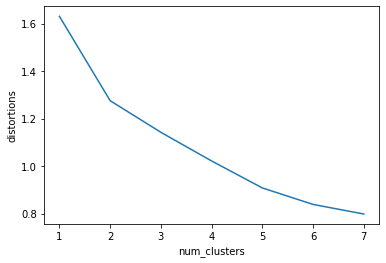

In [15]:
distortions = []

# assigning the cluster ranges
num_clusters = range(1, 8)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[df.columns], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters,'distortions':distortions})

# Creat a elbow plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)


In [16]:
# Generate cluster centers
cluster_centers, distortion = kmeans(df[df.columns], 2)

# Assign cluster labels
df['cluster_labels'], distortion_list = vq(df[df.columns], cluster_centers)

# Plot clusters
sns.scatterplot(x='scaled_tenure', y='scaled_income', hue='cluster_labels', data = df)

<AxesSubplot:xlabel='scaled_tenure', ylabel='scaled_income'>

<AxesSubplot:xlabel='scaled_tenure', ylabel='scaled_charge'>

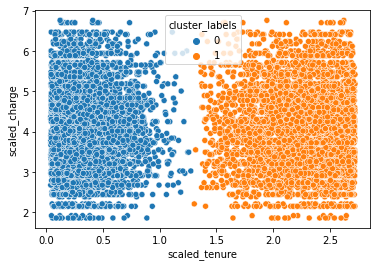

In [17]:
# Plot clusters
sns.scatterplot(x='scaled_tenure', y='scaled_charge', hue='cluster_labels', data = df)

In [18]:
df.cluster_labels.value_counts()

1    5002
0    4998
Name: cluster_labels, dtype: int64

### Part V: Data Summary and Implications
#### E. Summary

1. The accuracy of k-means is not evaluated because it is a clustering method rather than a classification tool. This is due to the fact that unsupervised learning do not train the model on class label data, hence there will be discrepancies between true and predicted class labels (Bedre, R., 2022, April 10).
2. Although, the total data points for each clusters were very similar. However, it's fair to say that the cluster with the majority represents customers who did not churn.
3. One limitation of the analysis is finding the optimal amount of clusters to use (k-Means Advantages and Disadvantages., n.d.) and that the dataset was labeled and not an unlabeled dataset, which is suited for unsupervised learning models.
4. From the analysis, it showed that each cluster had similar data points. Meaning that income or monthly charges probably has no effect on tenure. However, lowering rates on lower income customers most likely can increase retention rate.

<h2 style="text-align:center">References</h2><br>

Analytics, P. (2017, August 7). Exploring assumptions of k-means clustering using r: R-bloggers. R Blogger. Retrieved April 7, 2022, from<br> 
<span style="margin-left:2em">https://www.r-bloggers.com/2017/08/exploring-assumptions-of-k-means-clustering-using-r/ </span>

Cluster Analysis In Python. (n.d.). DataCamp. Retrieved March 7, 2022, from <br> 
<span style="margin-left:2em">https://www.datacamp.com/users/sign_in?redirect=http%3A%2F%2Fapp.datacamp.com%2Flearn%2Fcourses%2Fcluster-analysis-in-python</span>

k-Means Advantages and Disadvantages. (n.d.). Google Developers. Retrieved March 7, 2022, from <br>
<span style="margin-left:2em">https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages</span>

Drop column in pandas python. (2020, December 23). DataScience Made Simple. Retrieved April 13, 2022, from <br>
<span style="margin-left:2em">https://www.datasciencemadesimple.com/drop-delete-columns-python-pandas/</span>

Pandas DataFrame: SettingWithCopyWarning. (2018, April 9). Stack Overflow. Retrieved April 18, 2022, from <br>
<span style="margin-left:2em">https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy</span>

Bedre, R. (2022, April 10). k-means clustering in Python. Data Science. Retrieved April 18, 2022, from <br> 
<span style="margin-left:2em">https://www.reneshbedre.com/blog/kmeans-clustering-python.html</span>

Anwla, P. K. (2021, December 1). K-Means. TowardsMachineLearning. Retrieved April 19, 2022, from <br>
<span style="margin-left:2em">https://towardsmachinelearning.org/k-means/</span>